## Investigating Unknown Causes of Rural Wildfire Ignitions in Portugal


##### Group Name: Team 9

##### Name(s) & ID(s) of Group Members:
- Carolina da Silva Madaleno - Nº estudante: 202409898
- Helena Figueiredo de Almeida Alves - Nº estudante: 202403103
- João Pedro da Silva Brito - Nº estudante: 201805075
#####

## Table of Contents
* [Introduction](#itr)
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## Introduction <a id='itr'></a>

### Summary

Wildfires are a major environmental concern in Portugal, causing significant ecological damage, economic losses, and even threats to human safety. The country experiences a high frequency of rural fires each year, driven by a combination of natural factors and human activities. Understanding the causes of these fires is critical for developing effective prevention and mitigation strategies. However, a substantial number of fire incidents are reported with unknown causes, creating challenges in fully addressing the problem.

### Importance of Investigating Unknown Causes of Ignitions

Investigating unknown causes of rural wildfires is essential for several reasons. It allows for more accurate data analysis, which in turn improves prevention strategies, resource allocation, and understanding of the underlying factors contributing to fire occurrences. When the cause of a fire is unknown, the ability to implement targeted interventions is hindered, and opportunities to reduce future fire risks may be missed. Given that human activities are a significant factor in wildfire ignitions, uncovering the unknown causes can reveal trends related to behaviors, policies, or practices that need to be addressed.

### Research Question

The focus of this analysis is: **What are the patterns of ignitions with unknown causes, and how do they differentiate from fires with identified causes?**

The investigation aims to uncover whether there are specific temporal, spatial, or situational patterns associated with fires of unknown origin. By comparing these patterns to those of other fire causes, it may be possible to identify factors that contribute to the classification of a fire's cause as "unknown" and suggest areas where data collection or investigative procedures could be improved. This analysis will help provide insights into how fire management strategies can be enhanced to reduce the proportion of fires classified with unknown causes.

### Dataset Source

The Rural Wildfire dataset was provided by "ICNF", the government agency in Portugal responsible for nature conservation and forest management. You can access it [here](https://www.icnf.pt/florestas/gfr/gfrgestaoinformacao/estatisticas). It contains wildfire reports from 20xx to 2023.

This dataset provides statistical information about rural fire management, including historical data on wildfire occurrences, causes, and impacted areas. These statistics can be essential for identifying patterns, trends, and areas at higher risk of wildfires. The data typically include breakdowns by regions, years, months, and sometimes causes, offering a comprehensive picture of fire activity in the country.

### Phase 1: Data Preparation & Visualisation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")
###

In [ ]:
# name of the dataset to be imported from our GitHub account
# inc_total = pd.read_excel(r'C:\Users\helen\data_science\fecd_stats\Estatisticas_Incendios_SGIF_2001_2023 (1).xlsx')
# inc_micro = pd.read_excel(r'C:\Users\helen\data_science\fecd_stats\Registos_Incendios_SGIF_2021_2023.xlsx')

inc_total = pd.read_excel('Estatisticas_Incendios_SGIF_2001_2023.xlsx')
inc_micro = pd.read_excel('Registos_Incendios_SGIF_2021_2023.xlsx')

In [ ]:
# Visualizing 5 samples rows of the dataset
inc_micro.sample(5, random_state=999)

Codigo_SGIF   Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  \
16775  2022_16_0025688  2022160025688  2022    8   22    19         0.0   
15605  2022_13_0137872  2022130137872  2022    8    5    16         0.0   
2609          BL121374  2021180026858  2021    6    3    11         0.0   
21063      20230559447    20230559447  2023    5   11    17         0.0   
21326      20230585351    20230585351  2023    5   17    15         0.0   

       AreaMato_ha  AreaAgric_ha  AreaTotal_ha  ClasseArea  \
16775       0.0300           0.0        0.0300  ]0 a 1 ha[   
15605       0.0100           0.0        0.0100  ]0 a 1 ha[   
2609        0.0001           0.0        0.0001  ]0 a 1 ha[   
21063       0.0100           0.0        0.0100  ]0 a 1 ha[   
21326       0.2500           0.0        0.2500  ]0 a 1 ha[   

           DataHoraAlerta DataHora_PrimeiraIntervencao   DataHora_Extincao  \
16775 2022-08-22 19:19:00          2022-08-22 19:53:00 2022-08-22 20:39:00   
15605 2022-08-05 16:44:00          2022-08-05 16:49:00 2022-08-05 17:12:00   
2609  2021-06-03 11:53:00          2021-06-03 11:55:00 2021-06-03 12:03:00   
21063 2023-05-11 17:43:00          2023-05-11 17:50:00 2023-05-11 18:08:00   
21326 2023-05-17 15:31:00          2023-05-17 16:00:00 2023-05-17 17:28:00   

       Duracao_Horas  IncSup24horas  DTCCFR          Distrito  \
16775       1.333333              0  160121  Viana do Castelo   
15605       0.466667              0  130311             Porto   
2609        0.166667              0  180119             Viseu   
21063       0.416667              0  160508  Viana do Castelo   
21326       1.950000              0  180404             Viseu   

                Concelho   Freguesia                                 Local  \
16775  Arcos de Valdevez     Miranda                           Soutelinhos   
15605         Felgueiras       Moure  Lg de Argonda (EN101 (EN101) Km 133)   
2609             Armamar   Vila Seca     SANTO ADRIÃO (Quinta das Poldras)   
21063   Paredes de Coura    Ferreira                              FERREIRA   
21326            Cinfães  Espadanedo                                 Vales   

      RNAP RNMPF  X_Militar  Y_Militar   Latitude  Longitude      X_ETRS89  \
16775  NaN   NaN     168201     539448  41.823889  -8.515833 -31799.928313   
15605  NaN   NaN     196447     486753  41.350023  -8.175585  -3553.749642   
2609   NaN   NaN     241214     463345  41.138227  -7.642247  41212.495157   
21063  NaN   NaN     161814     551188  41.929167  -8.593611 -38186.963479   
21326  NaN   NaN     195557     457777  41.089167  -8.186111  -4443.248866   

            Y_ETRS89        DSR        FWI       ISI          DC         DMC  \
16775  239441.480199  11.322090  30.190001  9.540000  441.799988   67.599998   
15605  186749.167410   9.297626  27.010164  6.001383  619.713928  159.402328   
2609   163342.945807   3.138108  14.622705  4.707287  181.856282   58.252998   
21063  251180.815216   1.428515   9.374107  5.808186   67.404457   20.824293   
21326  157774.088220   5.593711  20.270000  9.070000  156.800003   38.700001   

            FFMC         BUI  CodCausa     TipoCausa  \
16775  90.099998   97.800003     122.0    Negligente   
15605  90.329781  192.807617     610.0  Desconhecida   
2609   87.326754   64.696407     122.0    Negligente   
21063  86.363632   22.674267     122.0    Negligente   
21326  89.699997   47.799999     448.0   Intencional   

                                           GrupoCausa  \
16775  Queimadas de sobrantes florestais ou agrícolas   
15605                                  Indeterminadas   
2609   Queimadas de sobrantes florestais ou agrícolas   
21063  Queimadas de sobrantes florestais ou agrícolas   
21326                      Incendiarismo - Imputáveis   

                                          DescricaoCausa FonteAlerta  
16775  Queimadas  extensivas - Limpeza do solo florestal         112  
15605                    Indeterminadas - Prova material   Populares  
2609   Queimada

### Variables analysed

In the project proposal, the following variables were identified for in-depth analysis:

**Target Variable:**
- Cause of ignition

**Categorical Variables:**
- **Location:** Region and municipality
- **Temporal Factors:** Month, hour, day of the week, year, and decade of the fire

**Numerical Variables:**
- **Ignition Duration:** The total time the fire was active.
- **Total Burned Area:** The size of the area affected by the fire.
- **Meteorological Fire Risk Indices:** Includes FWI, ISI, and BUI.
    - **FWI (Fire Weather Index)** and **BUI (Build-Up Index):** Higher values are associated with larger burned areas.
    - **ISI (Initial Spread Index):** Elevated levels indicate a higher number of fire occurrences.
    - Higher values across these indices generally indicate increased risks for larger, more frequent, and more intense fires.

## Data Cleaning and Preprocessing

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Drop irrelevant features in our dataset
*   Check and correct data types
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values
*   Check basic descriptive statics

Let's first display all the columns in our dataset.

In [ ]:
inc_micro.columns

Index(['Codigo_SGIF', 'Codigo_ANEPC', 'Ano', 'Mes', 'Dia', 'Hora',
       'AreaPov_ha', 'AreaMato_ha', 'AreaAgric_ha', 'AreaTotal_ha',
       'ClasseArea', 'DataHoraAlerta', 'DataHora_PrimeiraIntervencao',
       'DataHora_Extincao', 'Duracao_Horas', 'IncSup24horas', 'DTCCFR',
       'Distrito', 'Concelho', 'Freguesia', 'Local', 'RNAP', 'RNMPF',
       'X_Militar', 'Y_Militar', 'Latitude', 'Longitude', 'X_ETRS89',
       'Y_ETRS89', 'DSR', 'FWI', 'ISI', 'DC', 'DMC', 'FFMC', 'BUI', 'CodCausa',
       'TipoCausa', 'GrupoCausa', 'DescricaoCausa', 'FonteAlerta'],
      dtype='object')

In [ ]:
# Keep only the columns we need
inc_micro.drop(columns=['Codigo_SGIF', 'X_ETRS89', 'Y_ETRS89','Codigo_ANEPC','DataHora_PrimeiraIntervencao','DataHora_Extincao',
'RNAP','RNMPF','X_Militar','Y_Militar','Latitude','Longitude', 'FonteAlerta', 'CodCausa', 'GrupoCausa', 'DescricaoCausa',
'DSR', 'DTCCFR', 'Freguesia', 'Local', 'DTCCFR', 'DC', 'DMC', 'FFMC'], inplace=True)
#'AreaPov_ha','AreaMato_ha','AreaAgric_ha'


In [ ]:
# check data types
inc_micro.dtypes

Ano                        int64
Mes                        int64
Dia                        int64
Hora                       int64
AreaPov_ha               float64
AreaMato_ha              float64
AreaAgric_ha             float64
AreaTotal_ha             float64
ClasseArea                object
DataHoraAlerta    datetime64[ns]
Duracao_Horas            float64
IncSup24horas              int64
Distrito                  object
Concelho                  object
FWI                      float64
ISI                      float64
BUI                      float64
TipoCausa                 object
dtype: object

In [ ]:
# When area = 0 or duration = 0, we will replace it with NaN (proprably a missing value)
inc_micro['AreaTotal_ha'] = inc_micro['AreaTotal_ha'].replace(0, np.nan)
inc_micro['AreaPov_ha'] = inc_micro['AreaTotal_ha'].replace(0, np.nan)
inc_micro['AreaMato_ha'] = inc_micro['AreaTotal_ha'].replace(0, np.nan)
inc_micro['AreaAgric_ha'] = inc_micro['AreaTotal_ha'].replace(0, np.nan)
inc_micro['Duracao_Horas'] = inc_micro['Duracao_Horas'].replace(0, np.nan)

# Check for missing values
inc_micro.isnull().sum()

Ano                 0
Mes                 0
Dia                 0
Hora                0
AreaPov_ha         80
AreaMato_ha        80
AreaAgric_ha       80
AreaTotal_ha       80
ClasseArea          0
DataHoraAlerta      0
Duracao_Horas      11
IncSup24horas       0
Distrito            0
Concelho            0
FWI               130
ISI               130
BUI               130
TipoCausa         847
dtype: int64

In [ ]:

# Count the number of rows
print(f' The dataset has {len(inc_micro)} rows')
n1= len(inc_micro)

# As we don't have many missing values, we will drop them
inc_micro.dropna(inplace=True)

# Count the number of rows after dropping rows with missing values
print(f' The dataset has {len(inc_micro)} rows, after dropping rows with missing values')
print(f' {(1 - (len(inc_micro)/n1))*100}% of rows deleted, after dropping rows with missing values')

 The dataset has 26099 rows
 The dataset has 25059 rows, after dropping rows with missing values
 3.984827004866087% of rows deleted, after dropping rows with missing values


In [ ]:
# add new variables
inc_micro['DiaDaSemana'] = inc_micro['DataHoraAlerta'].dt.day_name()
# Creating the target variable
inc_micro['CausaDesconhecida'] = np.where(inc_micro['TipoCausa'].str.contains('Desconhecida'), 1, 0)

# Analysis basic descriptive statistics
inc_micro.describe(include='all')

Ano           Mes           Dia          Hora    AreaPov_ha  \
count   25059.000000  25059.000000  25059.000000  25059.000000  25059.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2021.968993      6.147492     15.978371     14.485654      6.887372   
min      2021.000000      1.000000      1.000000      0.000000      0.000002   
25%      2021.000000      4.000000      8.000000     12.000000      0.010000   
50%      2022.000000      7.000000     16.000000     15.000000      0.070000   
75%      2023.000000      8.000000     24.000000     18.000000      0.499377   
max      2023.000000     12.000000     31.000000     23.000000  24333.237905   
std         0.773620      2.501758      8.863907      5.347445    192.486423   

         AreaMato_ha  AreaAgric_ha  AreaTotal_ha  ClasseArea  \
count   25059.000000  25059.000000  25059.000000       25059   
unique           NaN           NaN           NaN           8   
top              NaN           NaN           NaN  ]0 a 1 ha[   
freq             NaN           NaN           NaN       20725   
mean        6.887372      6.887372      6.887372         NaN   
min         0.000002      0.000002      0.000002         NaN   
25%         0.010000      0.010000      0.010000         NaN   
50%         0.070000      0.070000      0.070000         NaN   
75%         0.499377      0.499377      0.499377         NaN   
max     24333.237905  24333.237905  24333.237905         NaN   
std       192.486423    192.486423    192.486423         NaN   

                       DataHoraAlerta  Duracao_Horas  IncSup24horas Distrito  \
count                           25059   25059.000000   25059.000000    25059   
unique                            NaN            NaN            NaN       18   
top                               NaN            NaN            NaN    Porto   
freq                              NaN            NaN            NaN     4970   
mean    2022-06-09 20:28:49.888662784       1.720864       0.005028      NaN   
min               2021-01-05 15:25:00       0.016667       0.000000      NaN   
25%               2021-08-31 22:08:00       0.483333       0.000000      NaN   
50%               2022-07-07 16:10:00       0.833333       0.000000      NaN   
75%               2023-02-20 15:01:00       1.483333       0.000000      NaN   
max               2023-11-23 18:53:00     665.700000       1.000000      NaN   
std                               NaN       9.416604       0.070732      NaN   

        Concelho           FWI           ISI           BUI   TipoCausa  \
count      25059  25059.000000  25059.000000  25059.000000       25059   
unique       284           NaN           NaN           NaN           5   
top     Penafiel           NaN           NaN           NaN  Negligente   
freq         671           NaN           NaN           NaN       10145   
mean         NaN     21.603346      7.138727    105.065416         NaN   
min          NaN    -80.000000    -80.000000    -80.000000         NaN   
25%          NaN      8.229811      4.119327     26.081460         NaN   
50%          NaN     19.143475      6.243865     78.699997         NaN   
75%          NaN     32.180000      9.260000    159.000000         NaN   
max          NaN     99.360001     46.639999    664.338404         NaN   
std          NaN     15.901246      5.002920     95.008807         NaN   

       DiaDaSemana  CausaDesconhecida  
count        25059       25059.000000  
unique           7                NaN  
top       Saturday                NaN  
freq          3947                NaN  
mean           NaN           0.352807  
min            NaN           0.000000  
25%            NaN           0.000000  
50%            NaN           0.000000  
75%            NaN           1.000000  
max            NaN           1.000000

In [ ]:
fwi_negative = inc_micro[inc_micro['FWI'] < 0].count()
isi_negative = inc_micro[inc_micro['ISI'] < 0].count()
bui_negative = inc_micro[inc_micro['BUI'] < 0].count()

print(f'FWI negative values: {fwi_negative.max()}')
print(f'ISI negative values: {isi_negative.max()}')
print(f'BUI negative values: {bui_negative.max()}')

## As they seem to be outliers, we will drop them
inc_micro = inc_micro[inc_micro['FWI'] > 0]
inc_micro = inc_micro[inc_micro['ISI'] > 0]
inc_micro = inc_micro[inc_micro['BUI'] > 0]

print(f' The dataset has {len(inc_micro)} rows, after dropping rows with metereological indices with negative values')

FWI negative values: 14
ISI negative values: 14
BUI negative values: 14
 The dataset has 25039 rows, after dropping rows with metereological indices with negative values


#### Main Takeaways

- **Unknown Cause:** Approximately 35% of total ignitions are recorded as having an unknown cause, which represents a significant portion of the data.

- **Area and Duration:** These variables exhibit significant left skewness.
    - The highest values are accurate and correspond to intense ignitions, as confirmed by information from ICNF. Therefore, outliers will be retained in the dataset.
    - To better analyze the data's variability, a logarithmic transformation will be applied.

- **Meteorological Indices:** Some indices contain negative values (e.g., -80), which may indicate data anomalies or outliers (affecting only 14 rows).
    - These rows have been removed to preserve the overall data distribution and ensure more accurate analysis.

In [ ]:
# Calculate logs of area and duration -> distribuitions are very skewed
inc_micro['log_area_total'] = np.log(inc_micro['AreaTotal_ha'])
inc_micro['log_area_pov'] = np.log(inc_micro['AreaPov_ha'])
inc_micro['log_area_mato'] = np.log(inc_micro['AreaMato_ha'])
inc_micro['log_area_agric'] = np.log(inc_micro['AreaAgric_ha'])
inc_micro['log_duracao'] = np.log(inc_micro['Duracao_Horas'])

The unique values for all columns with categorical data types are displayed to check for any white spaces and other data quality issues. It turns out that the data is already clean, and no futher data cleaning steps are necessary here.

In [ ]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
inc_micro.describe(include='object').T

count unique         top   freq
ClasseArea   25039      8  ]0 a 1 ha[  20706
Distrito     25039     18       Porto   4969
Concelho     25039    284    Penafiel    671
TipoCausa    25039      5  Negligente  10140
DiaDaSemana  25039      7    Saturday   3942

In [ ]:
# To see all unique values for categorical data types
categoricalColumns = inc_micro.columns[inc_micro.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(inc_micro[col].unique())
    print('')

Unique values for ClasseArea
[']0 a 1 ha[' '[1 a 10 ha]' '[20 a 50 ha]' '[10 a 20 ha]' '[100 a 500 ha]'
 '[50 a 100 ha]' '[superior a 1000 ha]' '[500 a 1000 ha]']

Unique values for Distrito
['Aveiro' 'Vila Real' 'Viseu' 'Bragança' 'Braga' 'Viana do Castelo'
 'Porto' 'Lisboa' 'Coimbra' 'Beja' 'Castelo Branco' 'Setúbal' 'Guarda'
 'Faro' 'Santarém' 'Portalegre' 'Leiria' 'Évora']

Unique values for Concelho
['Arouca' 'Valpaços' 'Tondela' 'Castro Daire' 'Alfândega da Fé'
 'Mondim de Basto' 'Chaves' 'Vila Verde' 'Ponte de Lima'
 'Arcos de Valdevez' 'Vila Real' 'Vila Pouca de Aguiar' 'Valença' 'Baião'
 'Paredes de Coura' 'Azambuja' 'Póvoa de Lanhoso' 'Vila Nova de Paiva'
 'Cinfães' 'Montalegre' 'Vila Nova de Gaia' 'Caminha' 'Penacova'
 'Figueira da Foz' 'Loures' 'Coimbra' 'Ponte da Barca' 'Odemira'
 'Oliveira do Bairro' 'Cabeceiras de Basto' 'Vouzela' 'Covilhã' 'Boticas'
 'Amares' 'Vieira do Minho' 'Grândola' 'Gondomar' 'Gouveia'
 'Idanha-a-nova' 'Terras de Bouro' 'Vale de Cambra' 'Cascais' 

In [ ]:
# Dataset Clean

inc_clean = inc_micro.to_excel(r'C:\Users\helen\data_science\fecd_stats\inc_clean.xlsx')


In [ ]:
inc_clean = inc_micro

## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### First Step
- **Data Profiling:** We utilized the Pandas Profiling library to generate a comprehensive summary and visualization of the chosen variables' basic distributions. This report provides an initial overview of the dataset, highlighting key statistics, data types, distribution patterns, and potential issues such as missing values or outliers, allowing for a deeper understanding of the data before proceeding with further analysis.

In [ ]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4e7c704cac54842a59a6a9cc2548014e778f1ab8af879fb82d2ad00af09ff96c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# create profilling report
profile = ProfileReport(inc_clean, title="Pandas Profiling Report", minimal=True)
# print the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Main Takeaways from the Profiling Report

**Temporal Variables:**
- **Year:** There was a peak in the number of wildfires in 2022.
- **Months:** The highest frequency of fires occurred in July and August.
- **Hour:** Most ignitions happened between 2 p.m. and 5 p.m.

**Duration:** Only 0.5% of the fires lasted longer than 24 hours.

## Analysing numerical variables

#### Correlations:
- A high correlation was found between burned area and fire duration, which makes sense as fires take time to spread to larger areas.
- The meteorological indices are also highly positively correlated with each other.
- On the other hand, the duration and area are not very correlated with the meteorological indices. The correlation varies between -0.13 and 0, indicating that large fires can also occur when the indices are not favorable for fire spread.


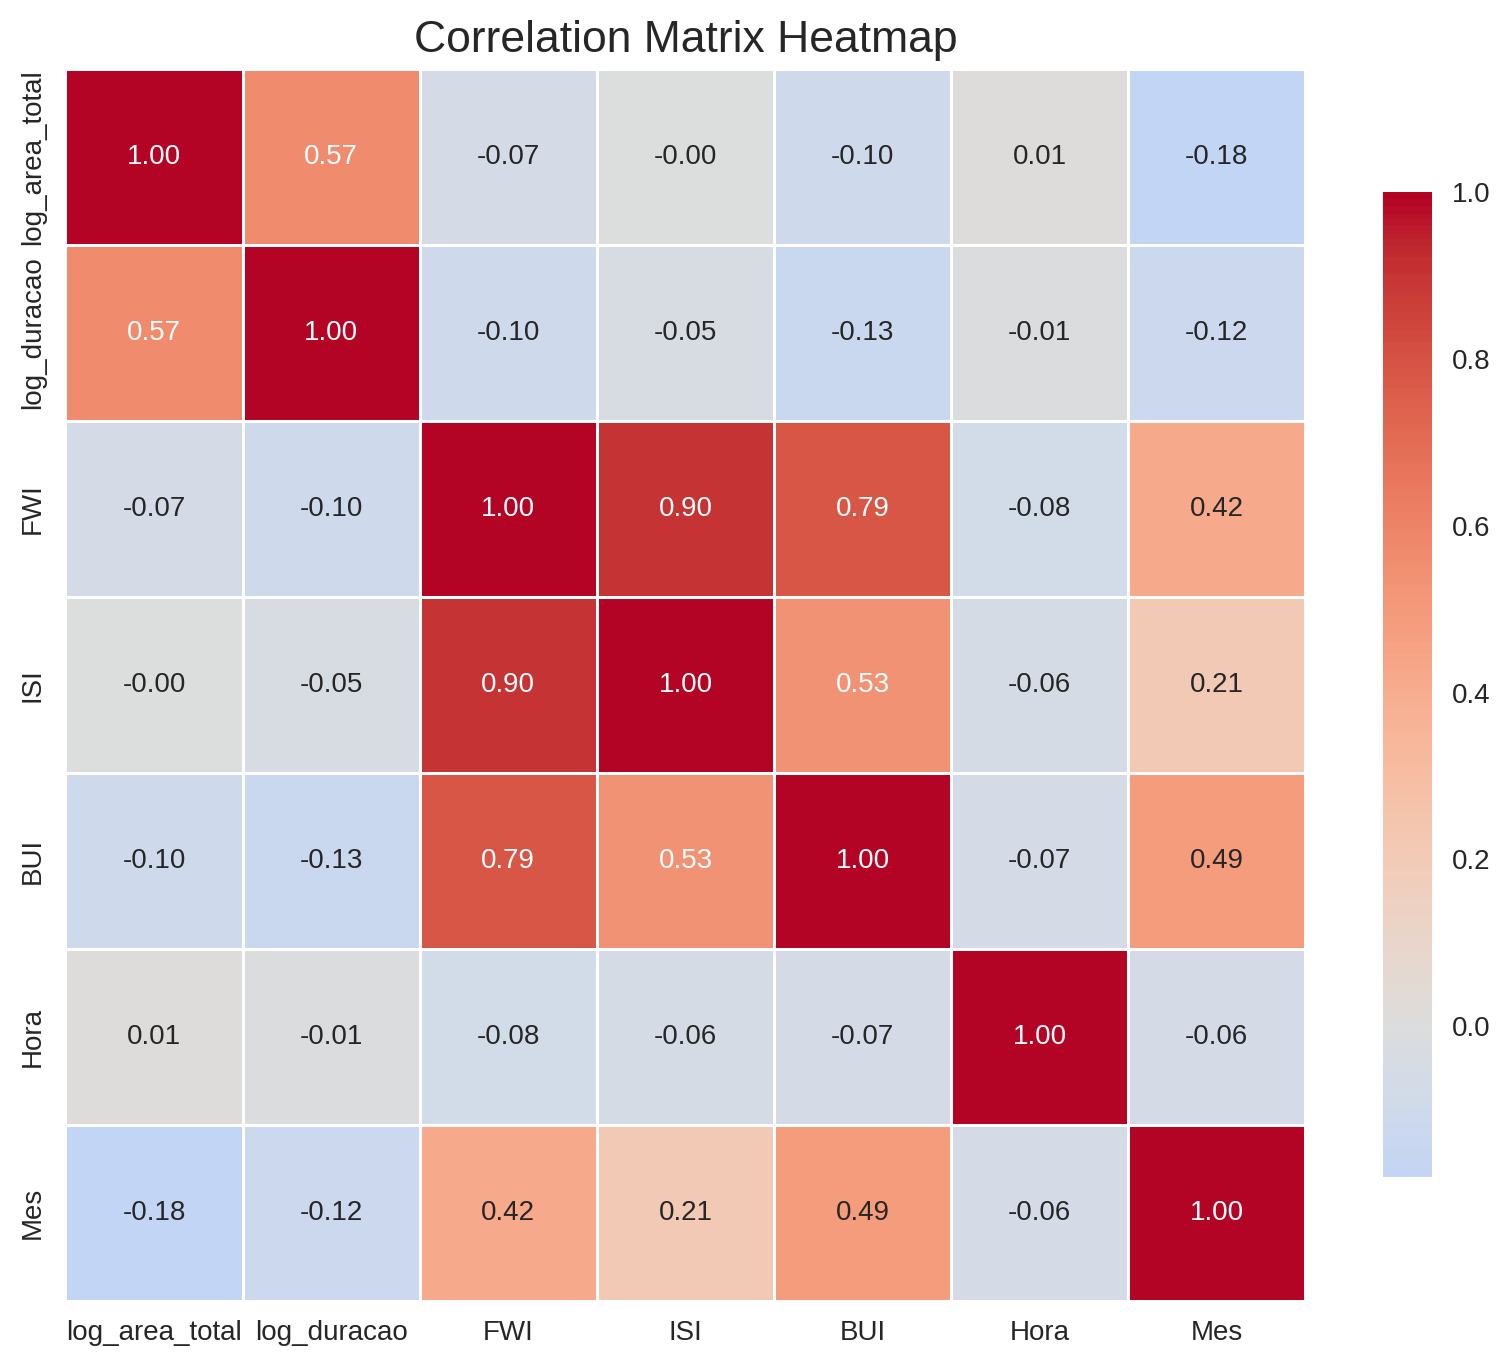

In [ ]:
# Correlation between variables

inc_numeric = pd.DataFrame(inc_clean, columns = ['log_area_total','log_duracao','FWI', 'ISI', 'BUI', 'Hora', 'Mes'])
# Function to plot a heatmap of the correlation matrix
def plot_correlation_matrix(df):
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Generate a heatmap with seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                linewidths=0.5, fmt=".2f", cbar_kws={'shrink': 0.8})

    # Add title
    plt.title('Correlation Matrix Heatmap', fontsize=16)

    # Show the plot
    plt.show()
# Call the function to plot the heatmap
plot_correlation_matrix(inc_numeric)

### Comparting Unknown causes and Other causes

#### Scatter Plots and Histograms:
- When examining the distributions grouped by Unknown causes and Other causes, we do not observe clear patterns differentiating the two samples.
- For area and distance, the peak of the KDE histogram appears to be at a lower value for unknown causes.


In [ ]:
#Comparing Unkown causes and others Causes

def scatterplot_matrix(df):
    # Filter numeric columns
    numeric_df = df #.select_dtypes(include=['float64', 'int64'])

    # Pairplot to visualize scatter plots between each pair of numeric variables
    sns.pairplot(numeric_df, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6}, hue = 'CausaDesconhecida', corner = True)
    sns.pairplot

    # Show the plot

    plt.show()

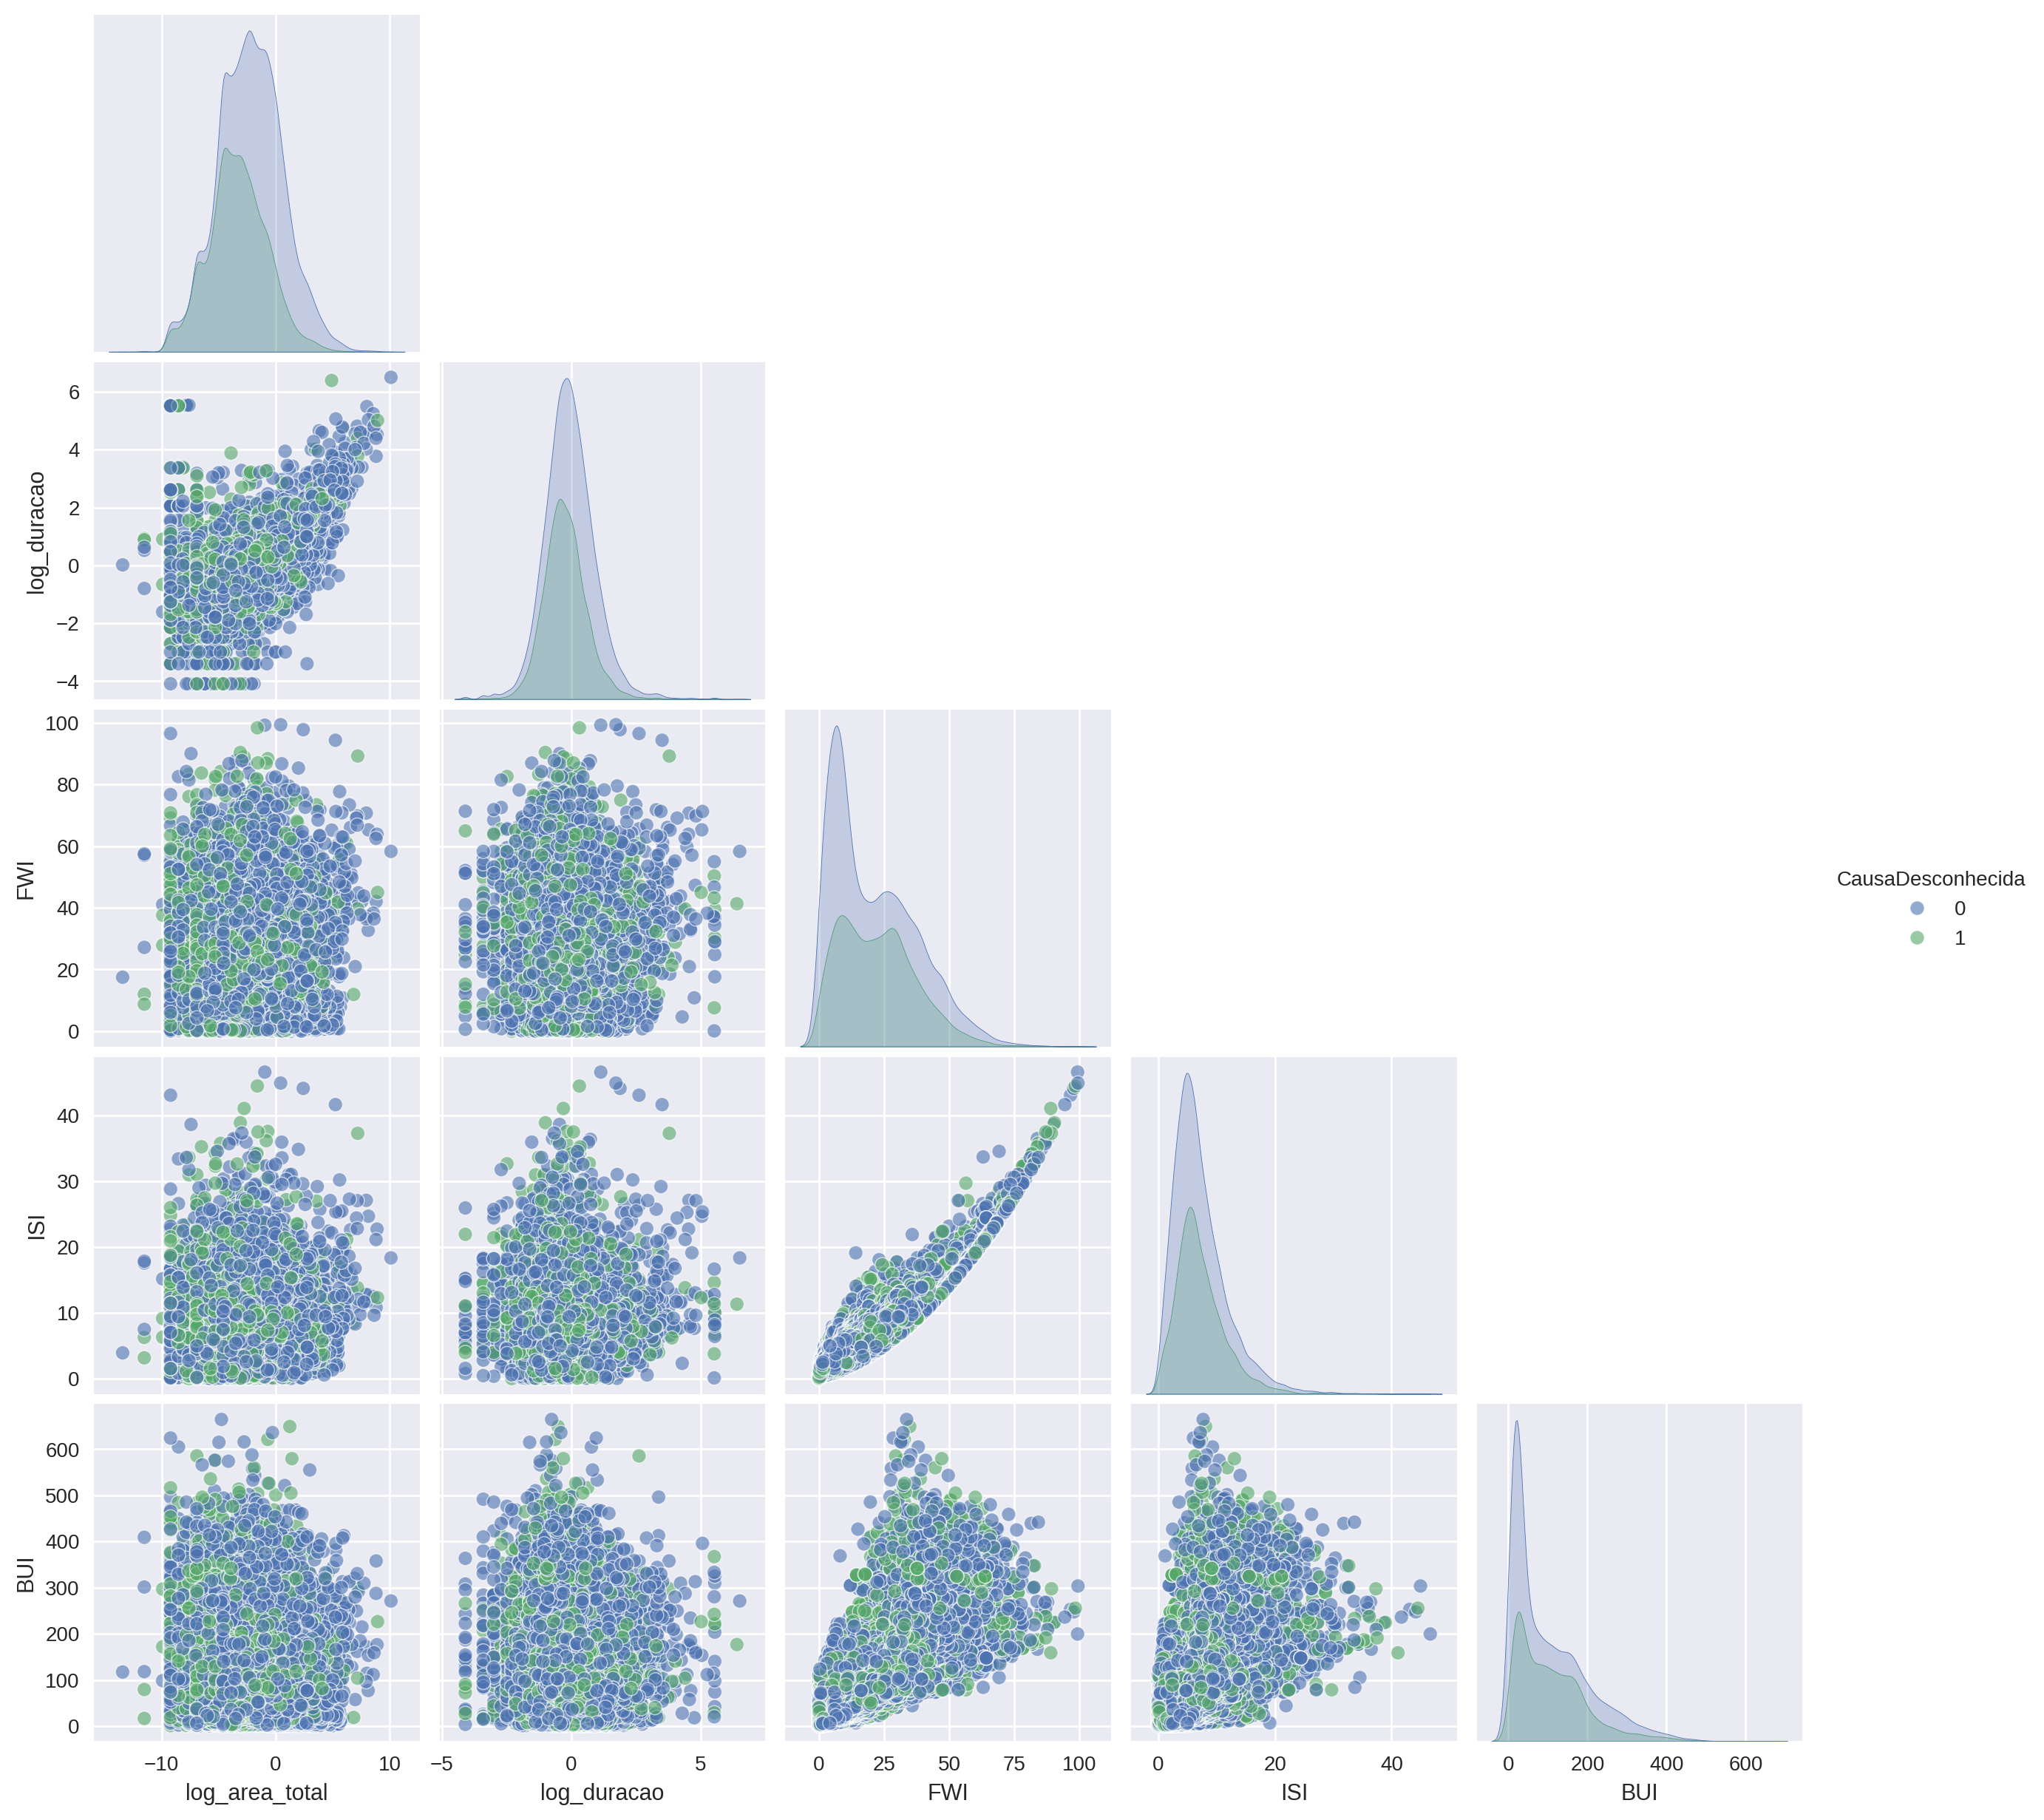

In [ ]:
# Comparing metereological indices
inc_numeric2 = pd.DataFrame(inc_clean, columns = ['log_area_total', 'log_duracao','FWI', 'ISI', 'BUI', 'CausaDesconhecida'])
scatterplot_matrix(inc_numeric2)

#### Boxplots
- The median values for **FWI** and **BUI** are higher when the cause of the fire is unknown.
- In contrast, the median values for **log area** (logarithm of the burned area) and **duration** are lower for fires with unknown causes.

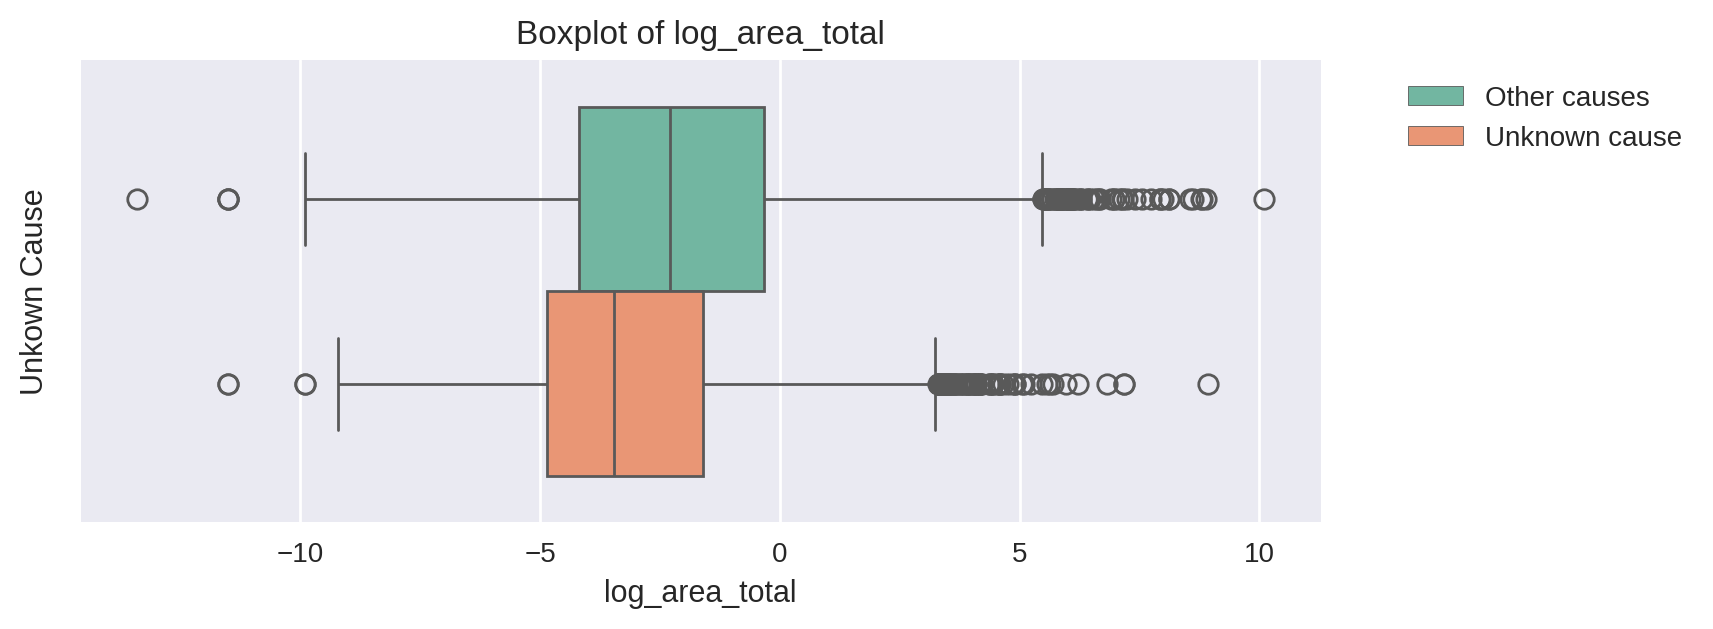

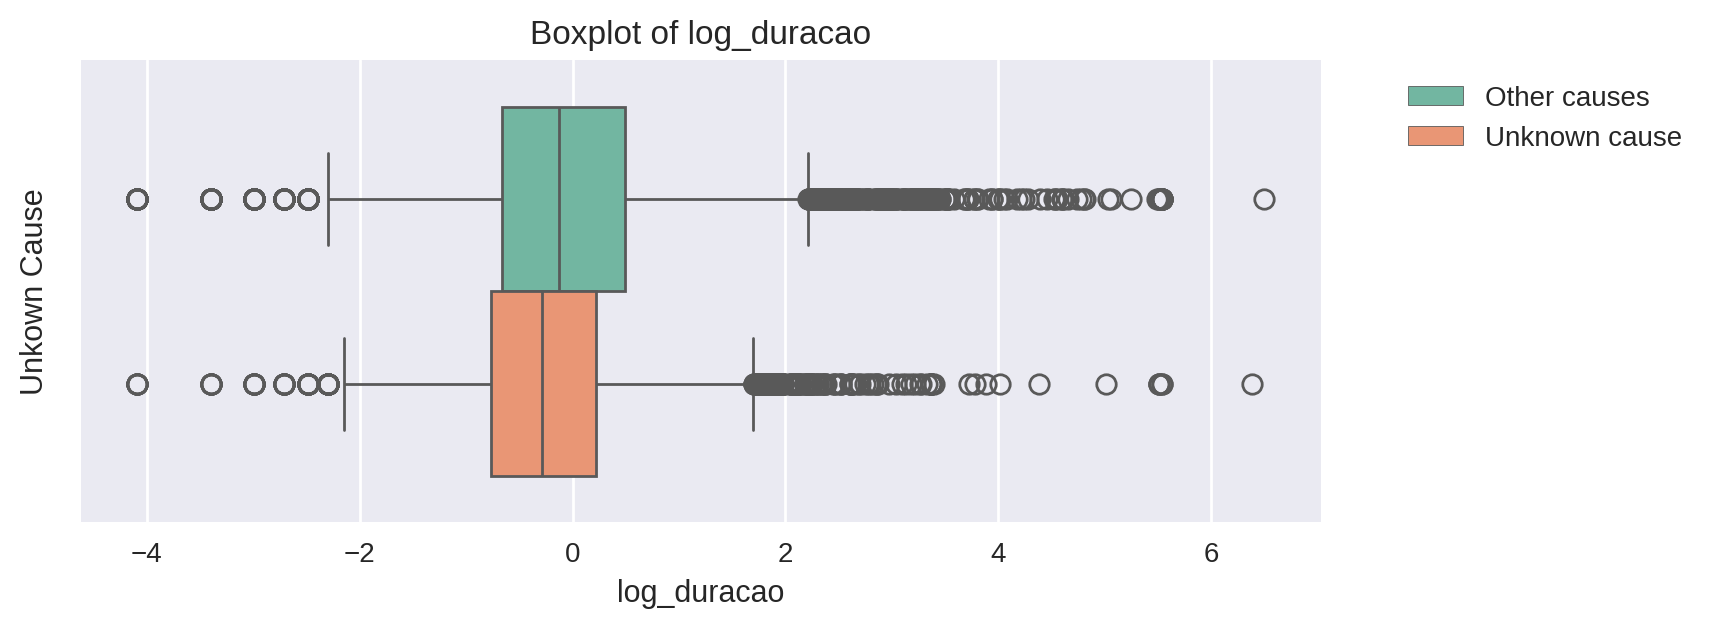

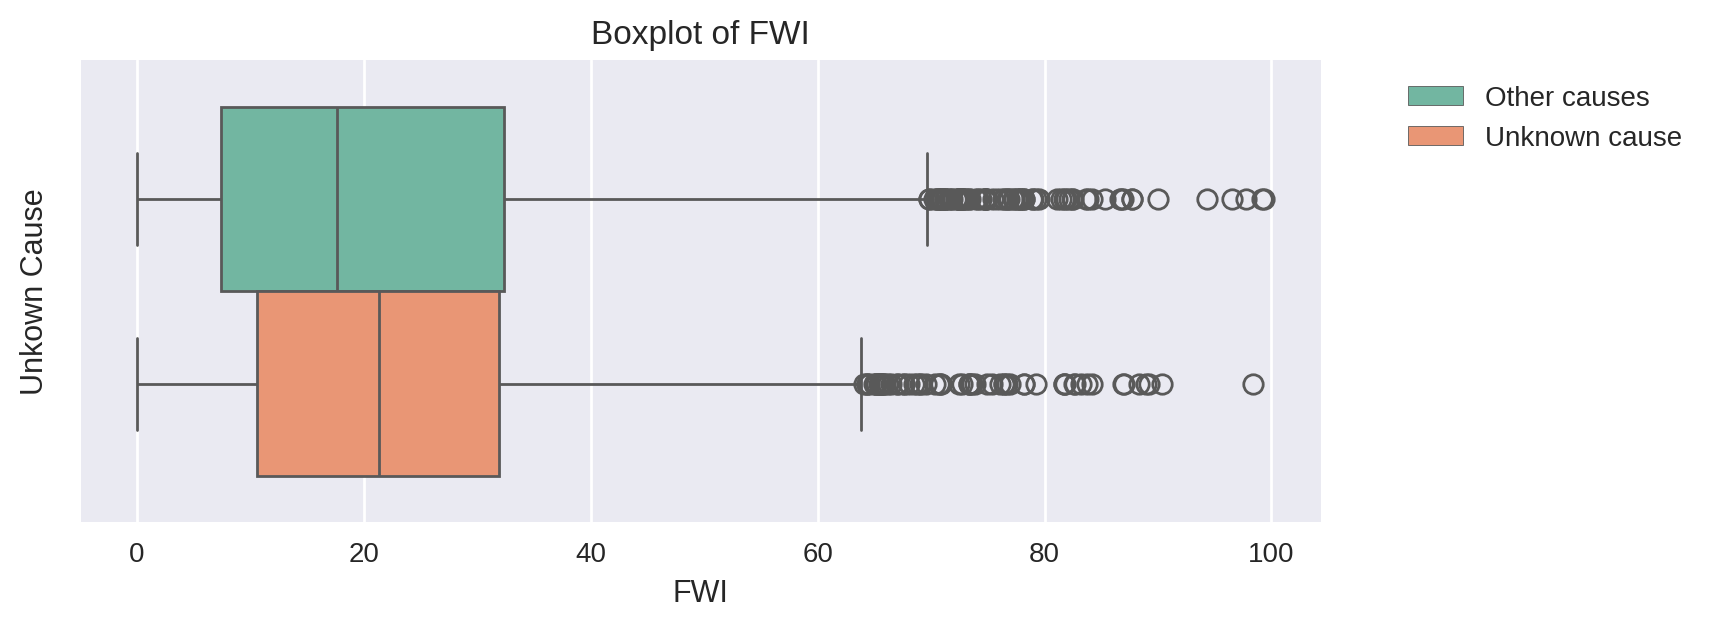

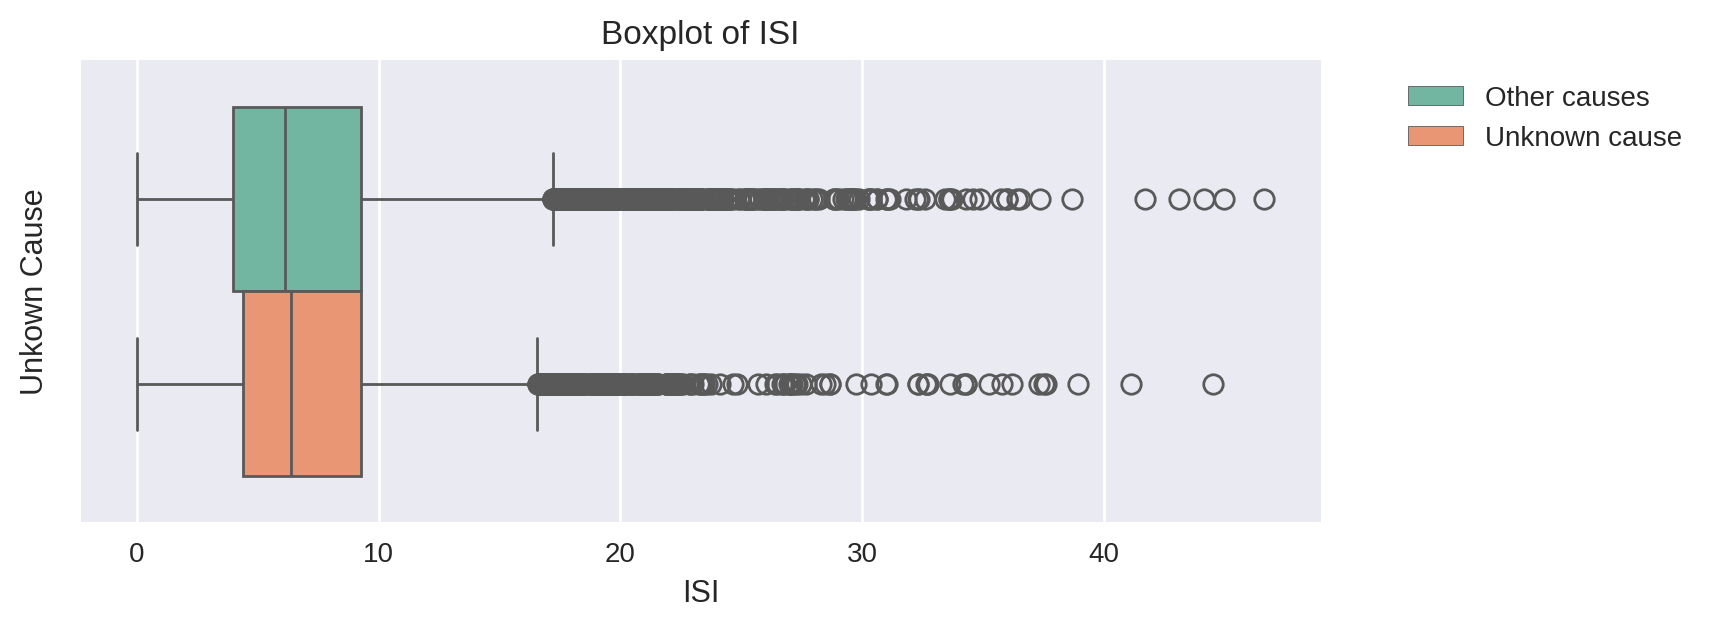

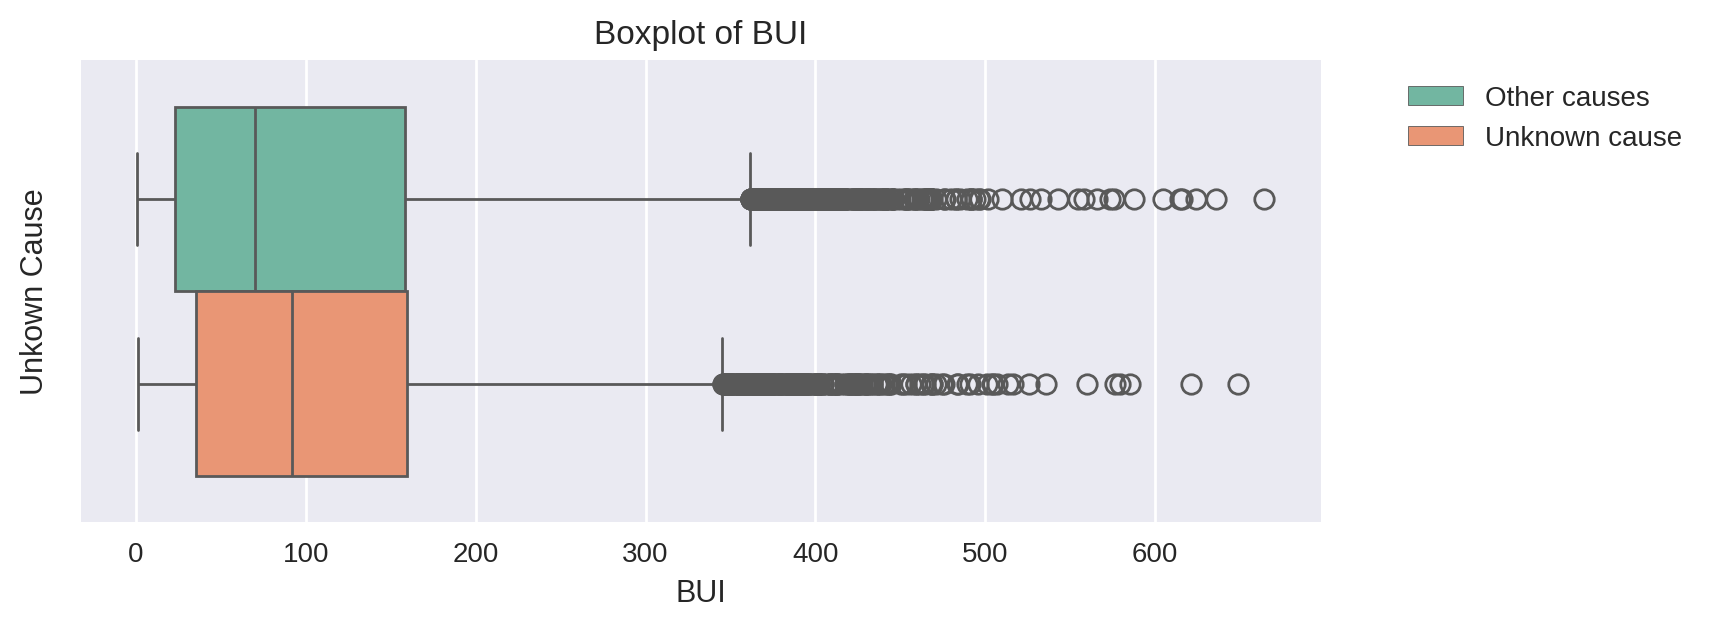

In [ ]:
# Boxplots

def plot_boxplots(df, columns):
    df['CausaDesconhecida'] = df['CausaDesconhecida'].map({0: 'Other causes', 1: 'Unknown cause'})

    for col in columns:
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=df[col], hue = df['CausaDesconhecida'], palette='Set2')
        plt.xlabel(col)
        plt.title(f'Boxplot of {col}')
        plt.ylabel('Unkown Cause')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

plot_boxplots(inc_clean, ['log_area_total', 'log_duracao','FWI', 'ISI', 'BUI'])


## Inferences - Hypothesis Testing

To verify the statistical significance of certain assumptions, hypothesis testing will be conducted using inference techniques. The following hypotheses have been chosen for analysis:

- Hypothesis 1
**Research Question**: Is there a difference in the average burnt area between fires with unknown causes and those with known causes? What is the confidence interval for the mean difference?

- Hypothesis 2
**Research Question**: Is the distribution of fires with unknown causes influenced by the region in which they occurred?

- Hypothesis 3
**Research Question**: Has the average number of fires with unknown causes remained stable over the years?

This structure will help determine whether the observed patterns are statistically significant or could have occurred by chance.

In [ ]:
## Important libraries for inference statistics

from scipy.stats import t
from scipy.stats import chi2_contingency

import statsmodels.api as sm
import statsmodels.stats.power as smp
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import TTestIndPower

##### Taking Random Samples

- Two random samples, each comprising 10% of the total number of fires, were taken from each group: Unknown Causes and Other Causes.

In [ ]:
# Taking random samples of the two groups
# It shouldn't more tem 10% of the population size
unkown = inc_clean[inc_clean['CausaDesconhecida']=='Unknown cause']
other_causes = inc_clean[inc_clean['CausaDesconhecida']=='Other causes']
sample_unkown = unkown.sample(frac=0.1, random_state=1)
sample_others = other_causes.sample(frac=0.1, random_state=1)

print(f'Population size Unkown causes = {len(unkown)} , sample size Other causes = {len(other_causes)}')
print(f'Sample size Unkown causes = {len(sample_unkown)} , sample size Other causes = {len(sample_others)}')

Population size Unkown causes = 8829 , sample size Other causes = 16210
Sample size Unkown causes = 883 , sample size Other causes = 1621


##### Checking Conditions for Inference

To ensure valid results from the inference tests, we need to verify that certain conditions are met:

- **Independent Observations**: Each ignition report is assumed to be independent of the others for this analysis.

- **At least 10 successes and 10 failures**: Given our large sample size (over 800 observations), the proportions being tested should be greater than 1% to satisfy this condition.

- **Sample Size Less Than 10% of the Population** (for sampling without replacement): The samples used in the analysis represent no more than 10% of the total population, meeting this requirement.

### Hypothesis 1:
**Research Question**: Is there a difference in the average burnt area between fires with unknown causes and those with known causes? What is the confidence interval for the mean difference?

- **Null Hypothesis (H₀)**: The mean burnt area of fires with unknown causes is equal to that of fires with known causes.
  - H₀: mean burnt area (unknown causes) = mean burnt area (known causes)
- **Alternative Hypothesis (Hₐ)**: The mean burnt area of fires with unknown causes differs from the mean burnt area of fires with known causes.
  - Hₐ: mean burnt area (unknown causes) ≠ mean burnt area (known causes)



In [ ]:
import pandas as pd

# Load the provided Excel files
file_path_1 = 'Registos_Incendios_SGIF_2021_2023.xlsx'
file_path_2 = 'Estatisticas_Incendios_SGIF_2001_2023.xlsx'

# Let's check the sheet names for both files first
xls_1 = pd.ExcelFile('Estatisticas_Incendios_SGIF_2001_2023.xlsx')
xls_2 = pd.ExcelFile('Registos_Incendios_SGIF_2021_2023.xlsx')

# Display sheet names to understand the structure
xls_1.sheet_names, xls_2.sheet_names


# Load the relevant sheets from the Excel files
df_fires_2021_2023 = pd.read_excel(file_path_1, sheet_name='SGIF_2021_2023')
df_statistics = pd.read_excel(file_path_2, sheet_name='Estatisticas_PortugalContinent')

# Let's inspect the first few rows of the first dataset to understand its structure
df_fires_2021_2023.head()


Codigo_SGIF   Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      BL3212  2021010001353  2021    1    5    15         0.0        0.000   
1      TM1213  2021170000717  2021    1    7    14         0.0        0.010   
2      BL1214  2021180001261  2021    1    7    18         0.0        0.680   
3      BL1215  2021180001268  2021    1    7    18         0.0        3.320   
4      TM2212  2021040000721  2021    1    7    18         0.0        0.003   

   AreaAgric_ha  AreaTotal_ha   ClasseArea      DataHoraAlerta  \
0        0.0123        0.0123   ]0 a 1 ha[ 2021-01-05 15:25:00   
1        0.0000        0.0100   ]0 a 1 ha[ 2021-01-07 14:09:00   
2        0.0000        0.6800   ]0 a 1 ha[ 2021-01-07 18:15:00   
3        0.0000        3.3200  [1 a 10 ha] 2021-01-07 18:17:00   
4        0.0000        0.0030   ]0 a 1 ha[ 2021-01-07 18:21:00   

  DataHora_PrimeiraIntervencao   DataHora_Extincao  Duracao_Horas  \
0          2021-01-05 16:05:00 2021-01-05 17:04:00       1.650000   
1          2021-01-07 14:47:00 2021-01-07 15:26:00       1.283333   
2          2021-01-07 18:36:00 2021-01-07 19:55:00       1.666667   
3          2021-01-07 19:15:00 2021-01-07 19:56:00       1.650000   
4          2021-01-07 18:32:00 2021-01-07 19:26:00       1.083333   

   IncSup24horas  DTCCFR   Distrito         Concelho        Freguesia  \
0              0   10402     Aveiro           Arouca        Alvarenga   
1              0  171220  Vila Real         Valpaços      Santa Valha   
2              0  182121      Viseu          Tondela         Silvares   
3              0  180316      Viseu     Castro Daire  Parada de Ester   
4              0   40111   Bragança  Alfândega da Fé          Sambade   

                 Local RNAP RNMPF  X_Militar  Y_Militar   Latitude  Longitude  \
0  Lourido (Carreiros)  NaN   NaN     199009     444246  40.967288  -8.144899   
1  Monte de Pardelinha  NaN   NaN     271361     527035  41.707778  -7.274444   
2             SILVARES  NaN   NaN     200399     406299  40.625584  -8.128396   
3              Sobrado  NaN   NaN     206100     443700  40.962344  -8.060669   
4              SAMBADE  NaN   NaN     297199     494200  41.411220  -6.970628   

       X_ETRS89       Y_ETRS89       DSR       FWI       ISI        DC  \
0   -991.121866  144243.570767  0.001316  0.180698  0.697716  2.889986   
1  71357.112308  227031.799593  0.006518  0.446143  1.579420  3.718020   
2    399.375244  106297.643713  0.009214  0.542493  1.817733  5.185042   
3   6099.723808  143697.733671  0.005889  0.421273  1.500755  3.849406   
4  97195.093632  194198.501679  0.006021  0.426579  1.615021  2.430952   

        DMC       FFMC       BUI  CodCausa    TipoCausa  \
0  0.776699  65.581411  0.929128     121.0   Negligente   
1  1.333320  80.617788  1.406066     121.0   Negligente   
2  1.513554  78.676647  1.750007     448.0  Intencional   
3  1.232262  77.484526  1.368957     125.0   Negligente   
4  1.077586  78.561693  1.030342     448.0  Intencional   

                                       GrupoCausa  \
0  Queimadas de sobrantes florestais ou agrícolas   
1  Queimadas de sobrantes florestais ou agrícolas   
2                      Incendiarismo - Imputáveis   
3        Queimadas para gestão de pasto para gado   
4                      Incendiarismo - Imputáveis   

                                    DescricaoCausa FonteAlerta  
0  Queimadas extensivas - Limpeza do solo agrícola      Outros  
1  Queimadas extensivas - Limpeza do solo agrícola         112  
2                          Imputáveis - Vandalismo   Populares  
3    Queimadas extensivas - Renovação de pastagens   Populares  
4                          Imputáveis - Vandalismo   Populares

In [ ]:
print(inc_clean.columns)

Index(['Ano', 'Mes', 'Dia', 'Hora', 'AreaPov_ha', 'AreaMato_ha',
       'AreaAgric_ha', 'AreaTotal_ha', 'ClasseArea', 'DataHoraAlerta',
       'Duracao_Horas', 'IncSup24horas', 'Distrito', 'Concelho', 'FWI', 'ISI',
       'BUI', 'TipoCausa', 'DiaDaSemana', 'CausaDesconhecida',
       'log_area_total', 'log_area_pov', 'log_area_mato', 'log_area_agric',
       'log_duracao'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

unknown_causes = inc_clean[inc_clean['CausaDesconhecida'] == 'Unknown cause']['AreaTotal_ha']
known_causes = inc_clean[inc_clean['CausaDesconhecida'] != 'Unknown cause']['AreaTotal_ha']

# Calculate means
mean_unknown = unknown_causes.mean()
mean_known = known_causes.mean()

print(f'Mean burnt area (Unknown causes): {mean_unknown:.2f}')
print(f'Mean burnt area (Known causes): {mean_known:.2f}')

# t-test
t_stat, p_value = stats.ttest_ind(unknown_causes, known_causes, equal_var=False)

# Confidence interval
mean_diff = mean_unknown - mean_known
std_err = np.sqrt(unknown_causes.var(ddof=1)/len(unknown_causes) + known_causes.var(ddof=1)/len(known_causes))
confidence_level = 0.95
degrees_of_freedom = len(unknown_causes) + len(known_causes) - 2
critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

margin_of_error = critical_value * std_err
conf_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

# Results
print(f'T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')
print(f'95% Confidence interval for the mean difference: {conf_interval[0]:.2f} to {conf_interval[1]:.2f}')

# Hypothesis testing result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in burnt area.")
else:
    print("Fail to reject the null hypothesis: No significant difference in burnt area.")


Mean burnt area (Unknown causes): 2.42
Mean burnt area (Known causes): 9.33
T-statistic: -3.4171, p-value: 0.0006
95% Confidence interval for the mean difference: -10.87 to -2.95
Reject the null hypothesis: There is a significant difference in burnt area.



### Hypothesis 2.a, 2.b, 2.c:
**Research Question**: Does the distribution of fires with unknown causes depend on the region (2.a), day of the week (2.b), and month (2.c) in which they occurred?

- **Null Hypothesis (H₀)**: The distribution of fires with unknown causes is independent of the region, day of the week, and month.
  - H₀: The distribution of fires with unknown causes is the same across regions, days of the week, and months.
  
- **Alternative Hypothesis (Hₐ)**: The distribution of fires with unknown causes varies by region, day of the week, and month.
  - Hₐ: The distribution of fires with unknown causes differs across regions, days of the week, and months.
  
- **Statistical Test**: A Chi-Square test for independence was chosen to assess this hypothesis. Three separate tests will be conducted to examine the independence of each categorical variable (region, day of the week, and month).


In [ ]:
# Taking a random sample of the clean dataset

sample = inc_clean.sample(frac=0.20, random_state=80)
print(f'Sample size = {len(sample)}')
print(f'Number of Unknown cause frequencies = {len(sample[sample["CausaDesconhecida"] == "Unknown cause"])}')
print(f'Number of Other causes frequencies  = {len(sample[sample["CausaDesconhecida"] == "Other causes"])}')

# chi2 test for idenpendence of categorical variables

cols = ['Distrito', 'DiaDaSemana', 'Mes']

for col in cols:
  contingency_table1 = pd.crosstab(sample['CausaDesconhecida'], sample[col])

  # Check if each frequency is greater than 5
  valid = (contingency_table1 >= 5).all().all()
  # Print the contingency table and validation result
  print(f'Variable {col} - All frequencies greater than 5: {valid}')

  chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table1)
  # print(contingency_table1)

  print(f"Chi-squared Statistic test for {col} and CausaDesconhecida")
  print(f"Chi2 stat: {chi2_stat:.4f}, p-value: {p_value:.9f}")


Sample size = 5008
Number of Unknown cause frequencies = 1759
Number of Other causes frequencies  = 3249
Variable Distrito - All frequencies greater than 5: True
Chi-squared Statistic test for Distrito and CausaDesconhecida
Chi2 stat: 2053.6311, p-value: 0.000000000
Variable DiaDaSemana - All frequencies greater than 5: True
Chi-squared Statistic test for DiaDaSemana and CausaDesconhecida
Chi2 stat: 18.7984, p-value: 0.004517920
Variable Mes - All frequencies greater than 5: True
Chi-squared Statistic test for Mes and CausaDesconhecida
Chi2 stat: 163.1425, p-value: 0.000000000


In [ ]:
# Check if each frequency is greater than 5
valid = (contingency_table1 >= 5).all().all()

# Print the contingency table and validation result
print(f'All frequencies greater than 5: {valid}')

All frequencies greater than 5: True


#### Checking conditions for Chi-squared test:
- Sufficient Sample Size: The sample size is large enough and meet the assumption that expected frequencies are generally at least 5 in each cell of the contingency table.

- Independence of Observations:
We assume that the observations in the dataset are independent, meaning that each fire report only appear once in the dataset and don't influence other observations.

#### Results:

The p-values for all three tests are below 5%, leading us to **reject the null hypothesis** for each categorical variable (district area, day of the week, and month).

This indicates that we have strong evidence to conclude, with 95% confidence, that the distribution of fires with unknown causes is not independent of the district area, day of the week, and month. In other words, **the frequencies of fires with unknown causes are significantly associated with these variables.**

### Hypothesis 3:
**Research Question**: Has the average number of fires with unknown causes remained stable over the years?

- **Statistical Test**: Analysis of Variance (ANOVA).
- **Null Hypothesis (H₀)**: The mean number of fires with unknown causes has remained consistent over the years.
  - H₀: The mean number of unknown cause fires is the same each year.
- **Alternative Hypothesis (Hₐ)**: The mean number of fires with unknown causes has varied over the years.
  - Hₐ: The mean number of unknown cause fires changes from year to year.
